<a href="https://colab.research.google.com/github/peela85/AIML/blob/master/M1_014_Isomap_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



## Learning Objective

At the end of the experiment, you will be able to:
            
*   Visualize the high-dimensional data (3D) to low-dimensional data (2D) by applying Isomap algorithm 
*    Understand how introduction of noise into data effects the lower-dimensional representation of data




In [0]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="800" height="300" controls>
  <source src="https://cdn.talentsprint.com/aiml/AIML_BATCH_HYD_7/Feb10/module_2_week_9_demo_lab_1.mp4" type="video/mp4">
</video>
""")

## Dataset 

### Description

The dataset choosen for this experiment is swissroll.

## Domain Information

Swiss Roll is a curled surface, where the distance between the points along the surface of the roll and direct distance is different.

If we just projected a 2D plane onto a 3D space it would simply squash the various layers together and lose all the information like geometry and similarity between points. we wanted to capture. Instead, what we want is to unroll the Swiss roll, to obtain a 2D data set,  without much loss of information. This approach is Manifold Learning.


Manifold Learning is when we bend and twist a high-dimensional space such that it can be mapped to a lower-dimensional space. It ensures that the optimal manifold is found by reducing the dimensionality of our data set.



## AIML Technique

In this experiment, swiss roll data is high-dimensional dataset which is difficult to visualize. To aid visualization of the structure of the dataset, the dimension must be reduced in some way. One of the approaches to manifold learning, Isomap performs dimensionality reduction by seeking lower dimensional embedding in data. Isomap maintains the geodesic distances between the points. This problem is unsupervised: it learns the non-linear structure in the data from the swiss roll data itself. 

#### Keywords

* Manifold
* Swiss roll
* Non - linear Dimensionality reduction
* Geo desic distance

#### Expected Time to complete the experiment : 30 mins

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181902225" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9059040698" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="M1W4_014_Isomap_C" #name of the notebook
Answer = "Graded"
def setup():
#  ipython.magic("sx pip3 install torch")
   
   print ("Setup completed successfully")
   return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [0]:
### Import the required packages
from sklearn.datasets import *
### Manifold is imported to access swiss roll dataset and the dimensionality reduction approach: Isomap
from sklearn import manifold
import matplotlib.pyplot as plt

### Generating the swiss roll data

In [0]:
### Specify the number of data samples from swiss roll
n_samples = 1500
''''we use make_swiss_roll method which takes the number of data samples and 
returns the 3D coordinates of those data samples with the colors projected onto each sample
input is 1500 samples and output will be 1500 X 3'''
X, color = make_swiss_roll(n_samples)

**Lets examine the shape of 'X' and 'color': You'll see here below that we are simply labelling each of the points along the swiss roll with a particular color. Note however that we are not labelling here for classification purposes. We are just labelling to be able to plot the swiss roll with different points representing different sets of colors. **

In [6]:
X.shape,color.shape

((1500, 3), (1500,))

### ISOMAP

####  Now reduce the dimensions of data from higher to lower

In [0]:
'''we use Isomap technique from manifold which takes as input 
 number of neighbors to be considered for each point calculated using a nearest neighbor search algorithm 
 in the swiss roll data and the manifold dimensions that the swiss roll data has to be transformed to'''
### We create an object of Isomap class

### NOTE: The n_neighbors that you see below, is basically the number of neighbors a givne point must consider, so that
### all the pair-wise distances between all these points is calculated, and a shortest graph path is found. This is considered
### as the actual distance between any two points in the 3d (and not Euclidean).
### NOTE: The n_components that you see below, is nothing but the number of lower dimensions you seek. Since the data was already
### 3d, we are choosing the next best i.e. 2D i.e. 2 components here.
iso = manifold.Isomap(n_neighbors=6, n_components=2)

### We are fitting the data to Isomap by getting distance along the manifold 
iso.fit(X)

### We will transform the data
manifold_data = iso.transform(X)

In [8]:
manifold_data.shape

(1500, 2)

### Visualization

#### Let us plot the data. In this we are going to see two plots, first plot represents swiss roll data and the second plot represents the reduced  data (reduced by Isomap)

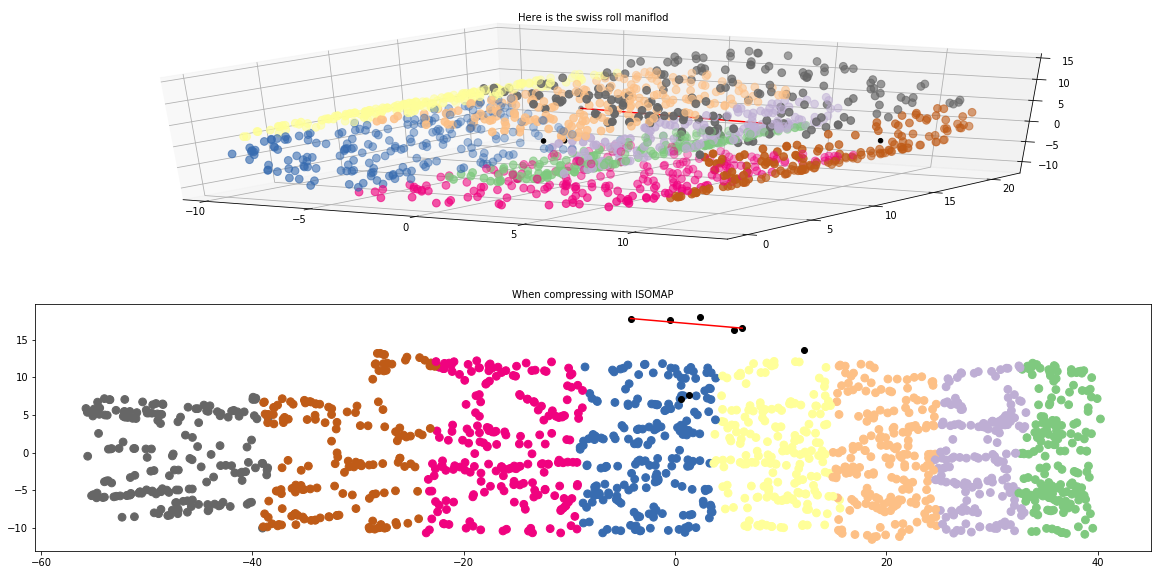

In [9]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod', fontsize=10)
ax.scatter(X[:,0],X[:,1],X[:,2],c = color,cmap="Accent",s=60)
x = X[:,0][2:10] 
y = X[:,1][2:10] # Just as abovve, this time for column 1
ax.scatter(x,y,c = "black") #Now we randomly plot this in both 3D manifold (this may not be clearly visible as the  existing
ax.plot(x[2:4],y[2:4],c = "red")
ax = fig.add_subplot(2, 1, 2) 

#Now we plot 2D after ISOMAP...
ax.set_title('When compressing with ISOMAP', fontsize=10)
ax.scatter(manifold_data[:,0],manifold_data[:,1],c = color,cmap="Accent",s=60)
x = X[:,0][2:10]#Now we plot the same 'black' samples, after ISOMAP in 2D and observe the distance in 2D.
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
plt.show()

#### Experiment with different values of n_neighbors to be passed to Isomap (Read about n_neighbors in previous cell comments.)

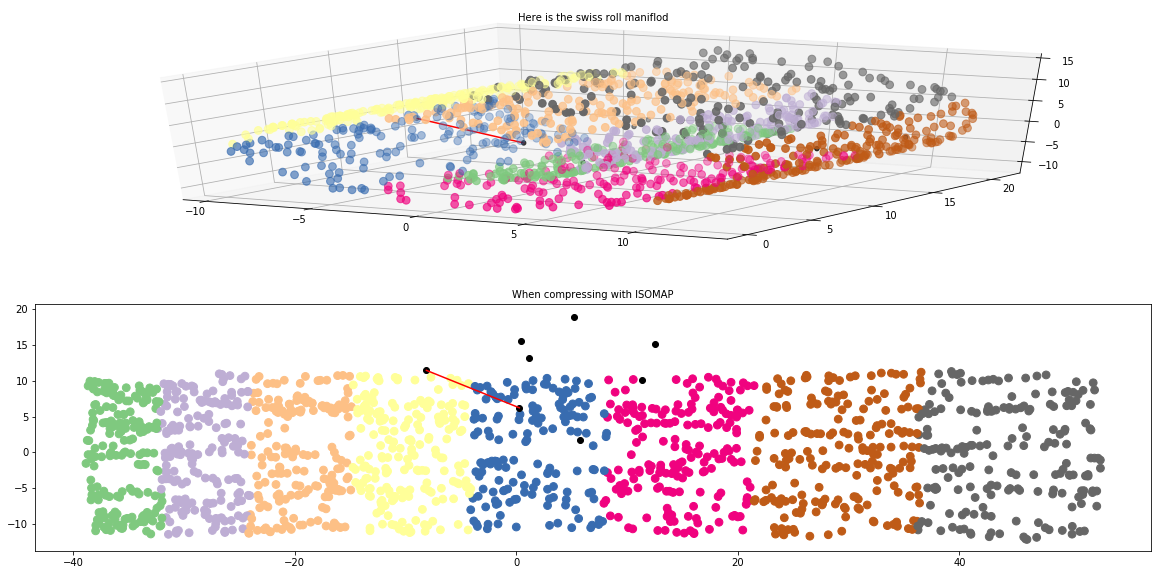

In [10]:
n_samples = 1500
X, color = make_swiss_roll(n_samples)

iso = manifold.Isomap(n_neighbors=10, n_components=2)
iso.fit(X)
manifold_data = iso.transform(X)

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod', fontsize=10)
ax.scatter(X[:,0],X[:,1],X[:,2],c = color,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('When compressing with ISOMAP', fontsize=10)
ax.scatter(manifold_data[:,0],manifold_data[:,1],c = color,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
plt.show()

#### Now let us generate swiss roll data for 300 samples with some noise in it. 

NOTE: Noise here below has two components. I.e. number of samples  and variance (i.e. the 'noise' variable you see below). The idea here is, you can only 10 samples, but they can contain a huge variance i.e. one noisy point can be in a 3d locaion (2,3,2) and other noisy point can be in a 3d location (40,80,100). As you can see the range of noise is high in the example just quoted. However if variance is low, the 3d point locations will be closer (and hence, as you might guess, the noise is less likely to disrupt the Manifold)


In [0]:
''' make_swiss_roll allows you to pass range of noisy samples along with n_samples 
where the range of noise affects the variance around data samples'''
noise = 0.01*200 
n_samples = 300
ndata,colors = make_swiss_roll(n_samples,noise)

#### Lets concatenate the noise data values and original data values

In [0]:
import numpy as np
con_data =  np.concatenate((X, ndata), axis=0)
con_colors = np.concatenate((color,colors),axis=0)

In [0]:
'''con_data has 300 additional samples that have been generated by make_swiss_roll with noise'''
### We create an object of Isomap class
iso = manifold.Isomap(n_neighbors=6, n_components=2)
### We are fitting the noisy data to Isomap by getting distance along the manifold
iso.fit(con_data)
### We will transform the data
manifold_data = iso.transform(con_data)

#### Let us plot the data

#### Let us plot the data. In this we are going to see two plots, first plot represents noisy swiss roll data with noise and the second plot represents the reduced noisy data (reduced by Isomap)

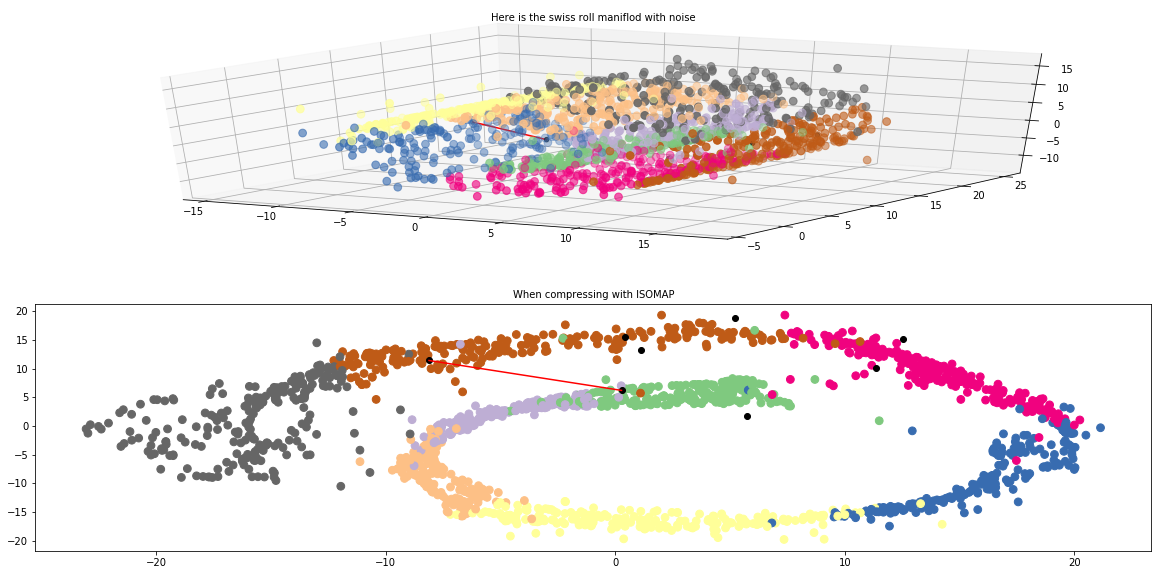

In [14]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod with noise', fontsize=10)
ax.scatter(con_data[:,0],con_data[:,1],con_data[:,2],c = con_colors,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('When compressing with ISOMAP', fontsize=10)
ax.scatter(manifold_data[:,0],manifold_data[:,1],c = con_colors,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
plt.show()

#### Vary the range of noise i.e variance in the data 
noise = 0.01*50 


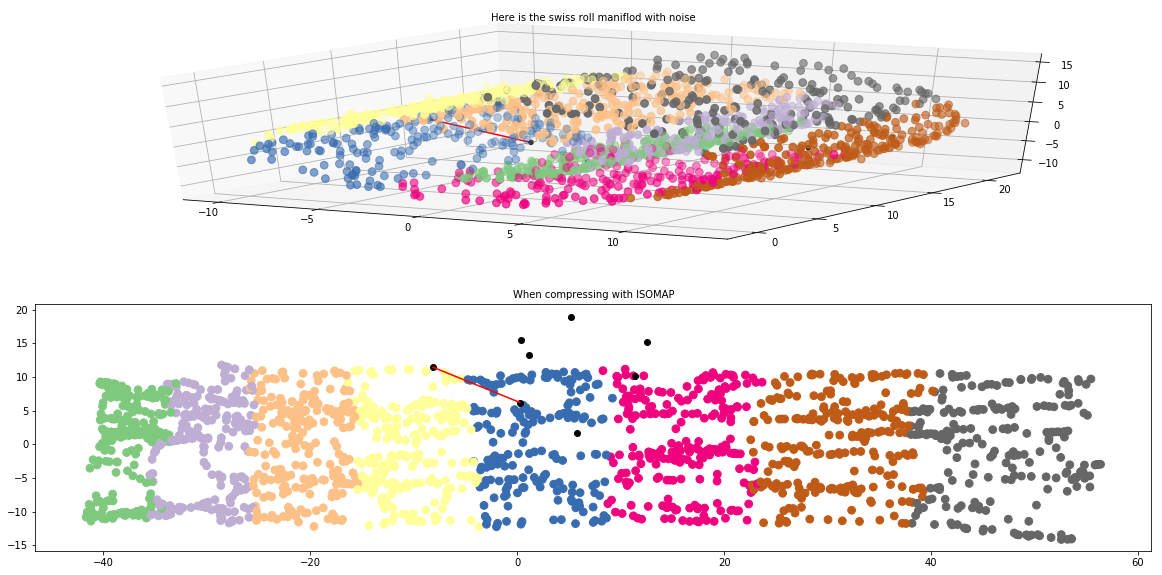

In [15]:
### Tweak noise i.e the variance around data samples to visualize the representation
noise = 0.01*50 
n_samples = 300
ndata,colors = make_swiss_roll(n_samples,noise)
con_data =  np.concatenate((X, ndata), axis=0)
con_colors = np.concatenate((color,colors),axis=0)
iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(con_data)
manifold_data = iso.transform(con_data)


from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod with noise', fontsize=10)
ax.scatter(con_data[:,0],con_data[:,1],con_data[:,2],c = con_colors,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('When compressing with ISOMAP', fontsize=10)
ax.scatter(manifold_data[:,0],manifold_data[:,1],c = con_colors,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
plt.show()

**As you can see above, when the variance of noise is reduced, the 2D representation of Manifold looks fine. The rest of the experiments with varying the values, is merely for the sake of trying things out, and always noticing that ISOMAP is very sensitive to Noise, which other techniques such as TSne will deal with better. You can see that in other experiment**

####  Vary the range of noise i.e variance in the data 
noise = 0.01*100


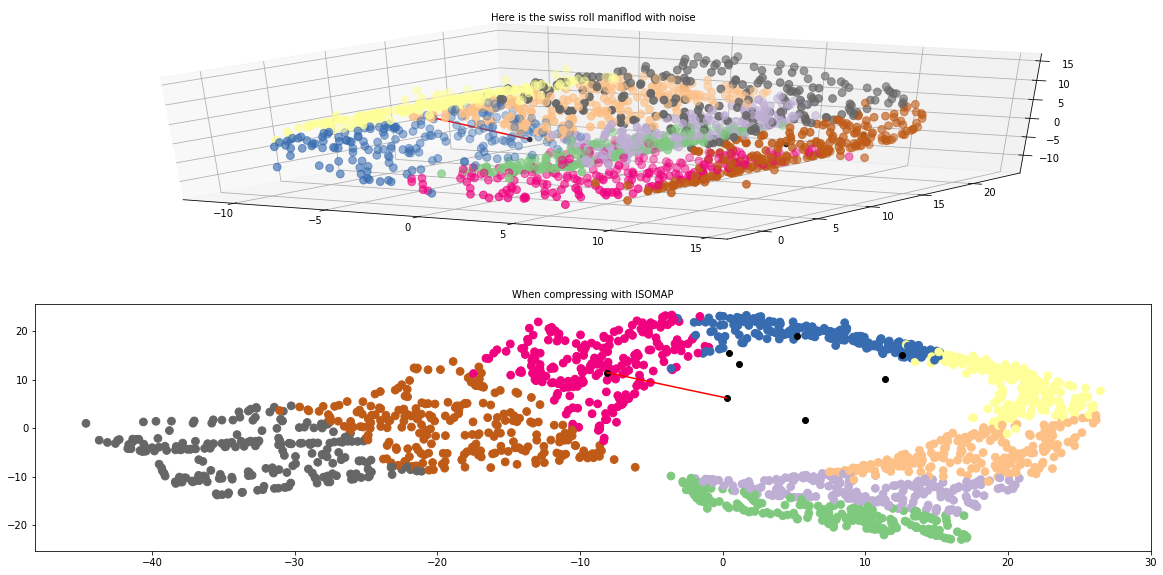

In [16]:
### Tweak noise i.e the variance around data samples to visualize the representation
noise = 0.01*100 
n_samples = 300
ndata,colors = make_swiss_roll(n_samples,noise)
con_data =  np.concatenate((X, ndata), axis=0)
con_colors = np.concatenate((color,colors),axis=0)
iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(con_data)
manifold_data = iso.transform(con_data)

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod with noise', fontsize=10)
ax.scatter(con_data[:,0],con_data[:,1],con_data[:,2],c = con_colors,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('When compressing with ISOMAP', fontsize=10)
ax.scatter(manifold_data[:,0],manifold_data[:,1],c = con_colors,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
plt.show()

####  Vary the range of noise i.e variance in the data 
noise = 0.01*200


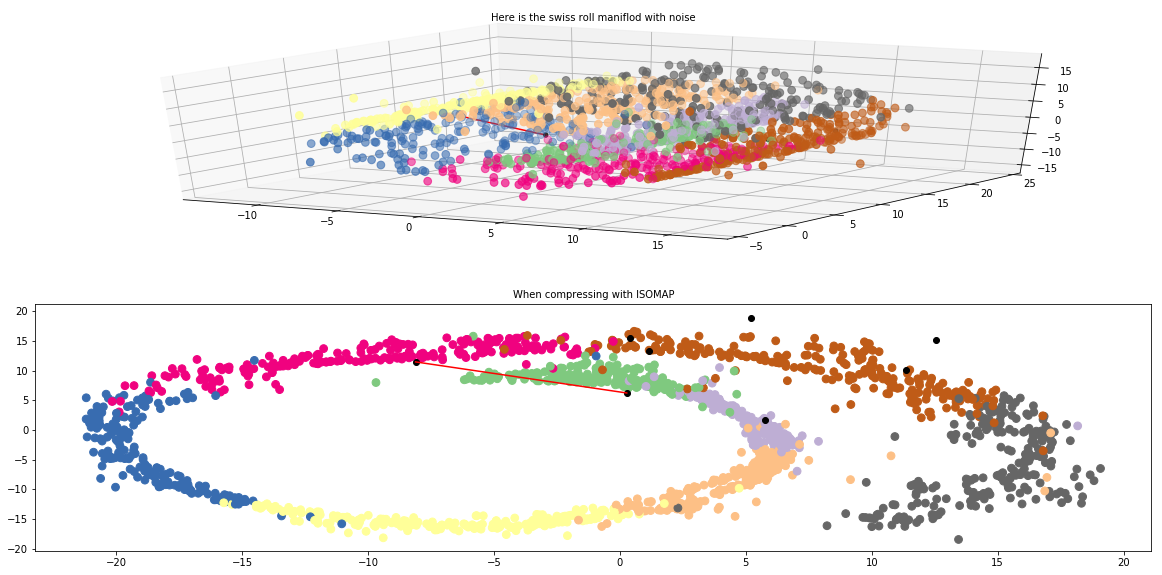

In [17]:
### Tweak noise i.e the variance around data samples to visualize the representation
noise = 0.01*200 
n_samples = 300
ndata,colors = make_swiss_roll(n_samples,noise)
con_data =  np.concatenate((X, ndata), axis=0)
con_colors = np.concatenate((color,colors),axis=0)
iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(con_data)
manifold_data = iso.transform(con_data)

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod with noise', fontsize=10)
ax.scatter(con_data[:,0],con_data[:,1],con_data[:,2],c = con_colors,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('When compressing with ISOMAP', fontsize=10)
ax.scatter(manifold_data[:,0],manifold_data[:,1],c = con_colors,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
plt.show()

#### Vary the number of samples of data with noise and plot the data
n = 10

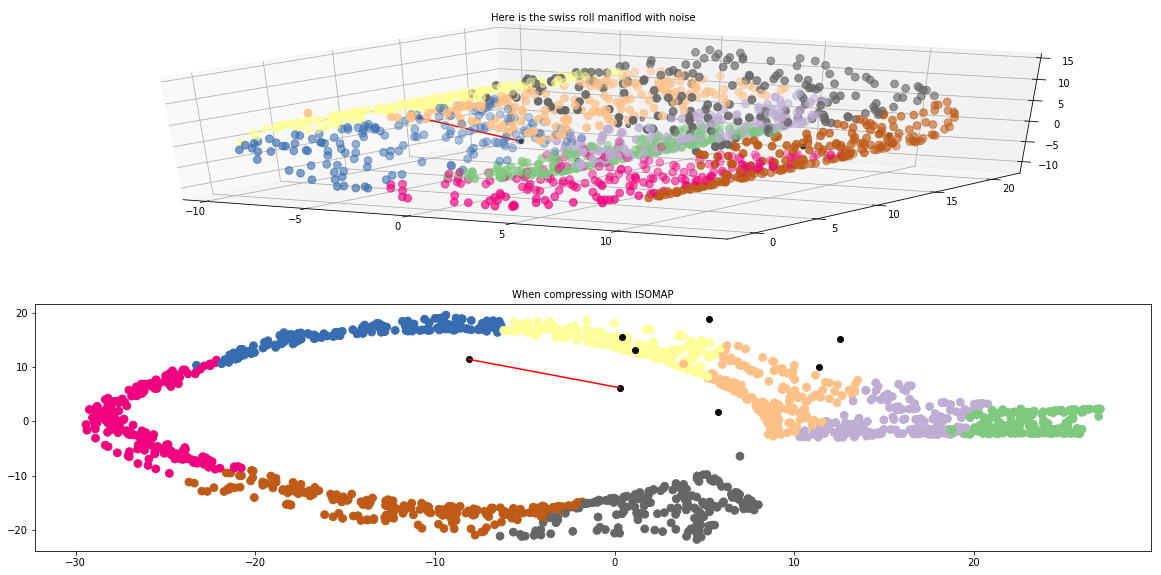

In [18]:
noise = 0.01*200 
n_samples = 10
ndata,colors = make_swiss_roll(n_samples,noise)
con_data =  np.concatenate((X, ndata), axis=0)
con_colors = np.concatenate((color,colors),axis=0)
iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(con_data)
manifold_data = iso.transform(con_data)

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod with noise', fontsize=10)
ax.scatter(con_data[:,0],con_data[:,1],con_data[:,2],c = con_colors,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('When compressing with ISOMAP', fontsize=10)
ax.scatter(manifold_data[:,0],manifold_data[:,1],c = con_colors,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
plt.show()

#### Varying the number of samples of data with noise and plot the data
n = 20

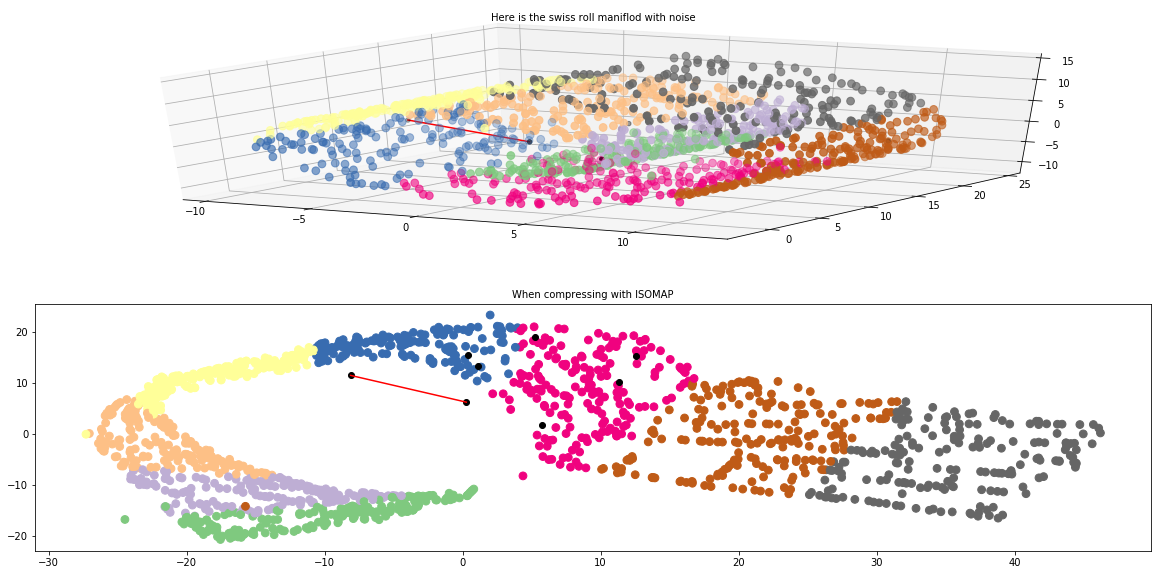

In [19]:
noise = 0.01*200 
n_samples = 20
ndata,colors = make_swiss_roll(n_samples,noise)
con_data =  np.concatenate((X, ndata), axis=0)
con_colors = np.concatenate((color,colors),axis=0)
iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(con_data)
manifold_data = iso.transform(con_data)

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod with noise', fontsize=10)
ax.scatter(con_data[:,0],con_data[:,1],con_data[:,2],c = con_colors,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('When compressing with ISOMAP', fontsize=10)
ax.scatter(manifold_data[:,0],manifold_data[:,1],c = con_colors,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
plt.show()

#### Varying the number of samples of data with noise and plot the data
n = 30

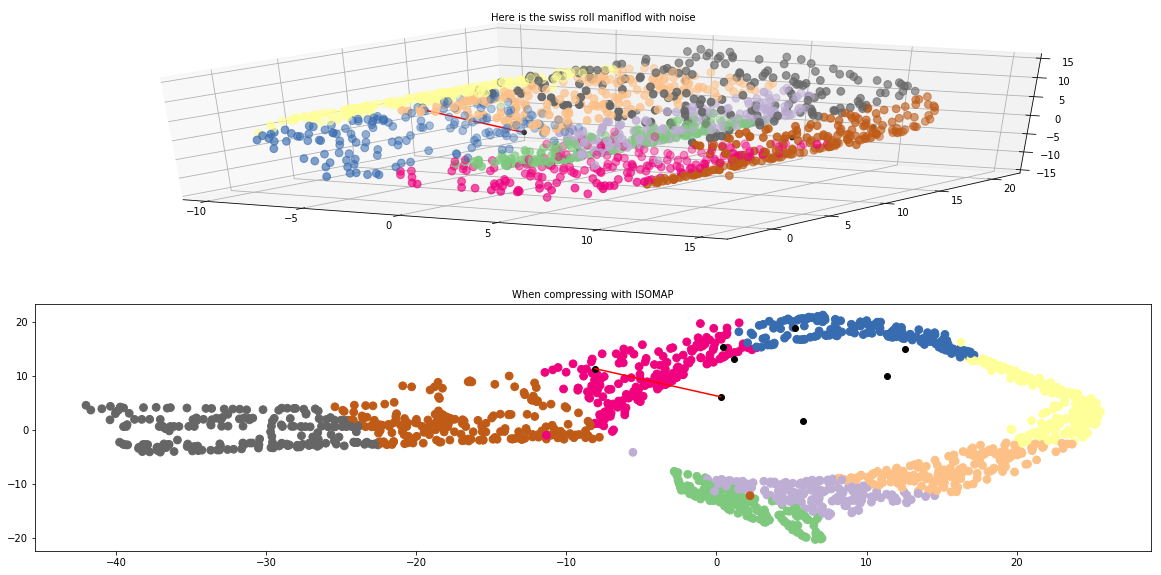

In [20]:
noise = 0.01*200 
n_samples = 30
ndata,colors = make_swiss_roll(n_samples,noise)
con_data =  np.concatenate((X, ndata), axis=0)
con_colors = np.concatenate((color,colors),axis=0)
iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(con_data)
manifold_data = iso.transform(con_data)

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod with noise', fontsize=10)
ax.scatter(con_data[:,0],con_data[:,1],con_data[:,2],c = con_colors,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('When compressing with ISOMAP', fontsize=10)
ax.scatter(manifold_data[:,0],manifold_data[:,1],c = con_colors,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
plt.show()

#### Summary

ISOMAP has the basic idea of preserve geodesic distance as measured along the manifold, hence can flatten (unroll) the swiss roll. Notice that Isomap connects nearby points and hence preserves the geodesic distances. This makes it prone to "short-circuit errors" in which due to noise, the nearest neighbours change and the dimensionality reduction fails due to this extra connectivity. This is illustrated by it failing to unroll the swiss roll.

### Please answer the questions below to complete the experiment:




In [0]:
#@title ISOMAP is less senstive to noise when compared to TSNE?  { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "False" #@param ["True", "False"]


In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Was Tough, but I did it" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "na" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [25]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 13245
Date of submission:  19 May 2019
Time of submission:  14:32:23
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
